<a href="https://colab.research.google.com/github/Sjoerd-de-Witte/Machine-Learning-2023/blob/main/1_6_K_Nearest_Neighbours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown -O /tmp/ml.py 174lBNvDBJSVWs3OpNL3a68cnhWIcWYuY
%run /tmp/ml.py

Downloading...
From: https://drive.google.com/uc?id=174lBNvDBJSVWs3OpNL3a68cnhWIcWYuY
To: /tmp/ml.py
100% 1.31k/1.31k [00:00<00:00, 5.78MB/s]


# K-Nearest Neighbors

K-nearest neighbors makes predictions by looking at the known class of the K-nearest neighbors in the training set. You have to set `k` to a value, this defines the number of nearest neighbors that is checked. Then for any point for which the class is estimated, the majority class of its k-nearest neighbors is used.

Like with previous models, the only thing that really changes in the workflow is the model that you instantiate.

# Data

In [2]:
from pipetorch import DFrame
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df = DFrame.read_from_kaggle('uciml/red-wine-quality-cortez-et-al-2009')
df['class'] = df.quality > 5
df = df[['pH', 'alcohol', 'class']].scale()

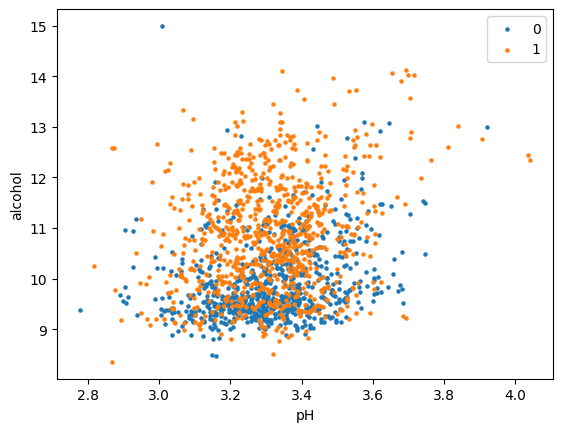

In [4]:
df.train.scatter2d_class(s=5, noise=0.1)

# Model

We use the knn class. You have to set `k` to a value, for some unclear reason the authors decided to use the parameter name `n_neighbors` instead of `k`. Start with `n_neighbors=5`. You can try out different values if you like.

In [5]:
# Instantiate a KNeighborsClassifier with n_neighbors=5
model = KNeighborsClassifier(n_neighbors=5)

# Train

In [6]:
# fit the model on the training as with the other model
model.fit(df.train_X, df.train_y)

KNeighborsClassifier()

In [8]:
# Retry the same experiment and set `k` to higher values. What changes and why?
model = KNeighborsClassifier(n_neighbors=8)
model.fit(df.train_X, df.train_y)

KNeighborsClassifier(n_neighbors=8)

# Validation

To validate the model, we will draw a `decision boundary` over the training data so that we can inspect if the model makes sense. In this case the decision boundary is non necessarily continuous, since we can have local regions (islands) in which the majority label is different from the surrounding regions.

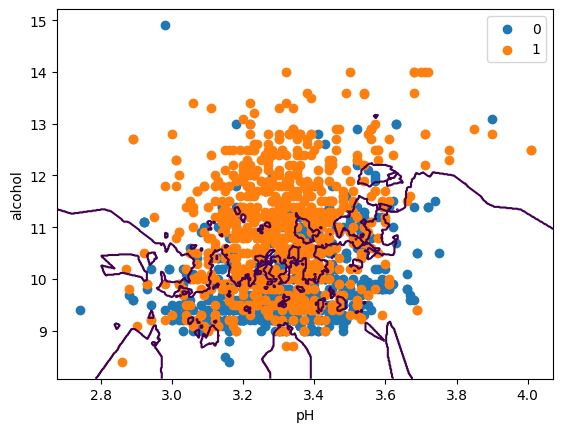

In [9]:
# plot the decision boundary over a scatter graph
df.train.scatter2d_class()
df.train.plot_boundary(model.predict)

In [ ]:
halt_notebook()